# Golf Ball (One Way Anova)

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

# Loading the dataset CSV file

In [2]:
## df=pd.read_csv('C:\\Users\\jayveer\\Downloads\\Golf ball\\Golfball.csv')
df=pd.read_csv('Golfball.csv')

# Checking the top 5 records

In [3]:
df.head()

,Design,Distance
0,Design1,206.32
1,Design1,207.94
2,Design1,206.19
3,Design1,204.45
4,Design1,209.65


# Checking the shape and information of the dataframe

In [4]:
df.shape

(40, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Design    40 non-null     object 
 1   Distance  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


# Checking the summary of the dataframe

In [8]:
df.describe(include='all')

,Design,Distance
count,40,40.000000
unique,4,NaN
top,Design1,NaN
freq,10,NaN
mean,NaN,220.085000
std,NaN,9.697758
min,NaN,203.810000
25%,NaN,211.580000
50%,NaN,221.485000
75%,NaN,228.390000


# Checking distinct values of Design

In [10]:
df['Design'].unique()

array(['Design1', 'Design2', 'Design3', 'Design4'], dtype=object)

In [11]:
df['Distance'].uniqueque()

array([206.32, 207.94, 206.19, 204.45, 209.65, 203.81, 206.75, 205.68,
       204.49, 210.86, 217.08, 221.43, 218.04, 224.13, 211.82, 213.9 ,
       221.28, 229.43, 213.54, 214.51, 226.77, 224.79, 229.75, 228.51,
       221.44, 223.85, 223.97, 234.3 , 219.5 , 233.  , 230.55, 227.95,
       231.84, 224.87, 229.49, 231.1 , 221.53, 235.45, 228.35, 225.09])

# One Way Anova

In [52]:
df_new = df.copy()

In [56]:
df_new.Design.replace(to_replace='Design1', value=1, inplace= True)
df_new.Design.replace(to_replace='Design2', value=2, inplace= True)
df_new.Design.replace(to_replace='Design3', value=3, inplace= True)
df_new.Design.replace(to_replace='Design4', value=4, inplace= True)

In [57]:
df_new.head()

,Design,Distance
0,1,206.32
1,1,207.94
2,1,206.19
3,1,204.45
4,1,209.65


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Design    40 non-null     int64  
 1   Distance  40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [59]:
formula = 'Design ~ Distance'
model = ols(formula, df_new).fit()
anova_table = anova_lm(model)
pd.set_option('expand_frame_repr',False)
print(anova_table)

            df     sum_sq    mean_sq           F        PR(>F)
Distance   1.0  37.421588  37.421588  113.052449  6.039434e-13
Residual  38.0  12.578412   0.331011         NaN           NaN


Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the mean distances travelled by the golf balls with different designs

# Drawing a Point Plot

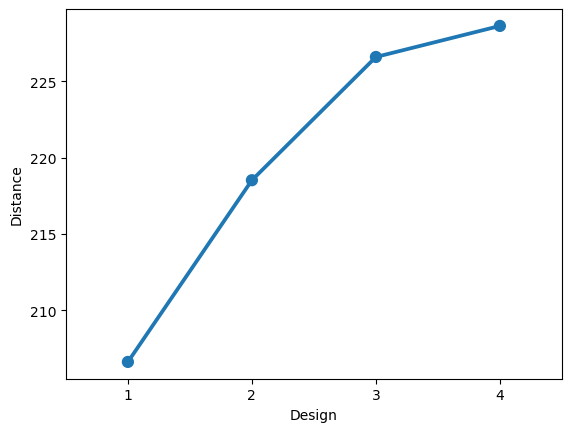

In [64]:
sns.pointplot(x='Design', y='Distance', data=df_new, errorbar=None);